[View in Colaboratory](https://colab.research.google.com/github/sdevika/MLBootCamp/blob/master/lab2_partA.ipynb)

## Lab 2: Part A: Logistic regression
We explore logistic regression in this notebook on two toy data sets.

In [0]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Unregularized logistic regression

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


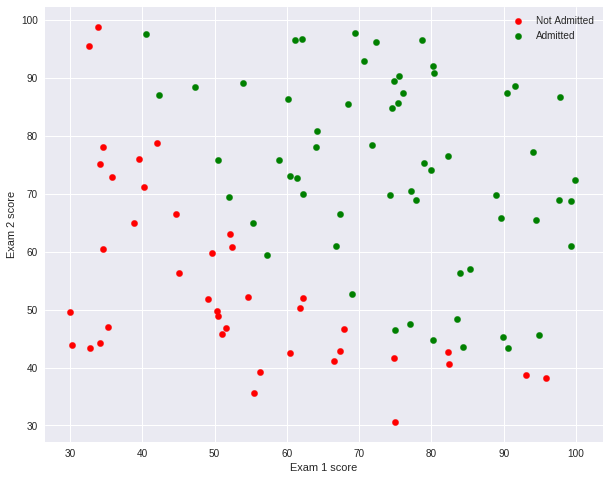

In [4]:
##================ Part 0: Reading data and plotting ==================#

data = pd.read_csv('MLBootCamp/ex1data1.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

def plot_twoclass_data(X,y,xlabel,ylabel,legend):
    fig = plt.figure()
    X0 = X[np.where(y==0)]
    X1 = X[np.where(y==1)]
    plt.scatter(X0[:,0],X0[:,1],c='red', s=40, label = legend[0])
    plt.scatter(X1[:,0],X1[:,1],c='green', s = 40, label=legend[1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="upper right")

print 'Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...'
plot_twoclass_data(X,y,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])

### Fit logistic model and visualize decision boundary

Theta found by sklearn:  [[0.20623222 0.2014719 ]] [-25.16138457]


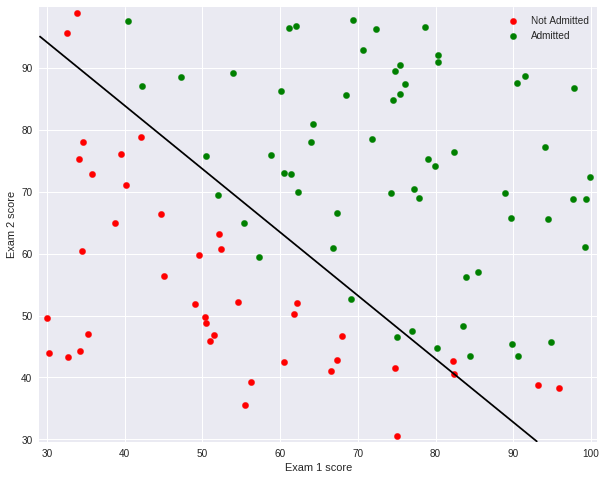

In [7]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5,solver='lbfgs',fit_intercept=True)
logreg.fit(X,y)
print "Theta found by sklearn: ", logreg.coef_, logreg.intercept_

def plot_decision_boundary_sklearn(X,y,sk_logreg,  xlabel, ylabel, legend):
    plot_twoclass_data(X,y,xlabel,ylabel,legend)
    
    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    # make predictions on this mesh
    Z = np.array(sk_logreg.predict(np.c_[xx1.ravel(), xx2.ravel()]))

    # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])

plot_decision_boundary_sklearn(X,y,logreg,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])


### Predicting with a logistic regression model

In [8]:
#  calculate the probability of a student being admitted with score of 45,85

pred_prob = logreg.predict_proba(np.array([[45,85]]))[0][1]
print "For a student with 45 on exam 1 and 85 on exam 2, the probability of admission = ", pred_prob

# compute accuracy on the training set

predy = logreg.predict(X)

# calculate the accuracy of predictions on training set 

accuracy = np.mean(predy==y)
print "Accuracy on the training set = ", accuracy

For a student with 45 on exam 1 and 85 on exam 2, the probability of admission =  0.7762901213932106
Accuracy on the training set =  0.89


### Regularized logistic regression

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


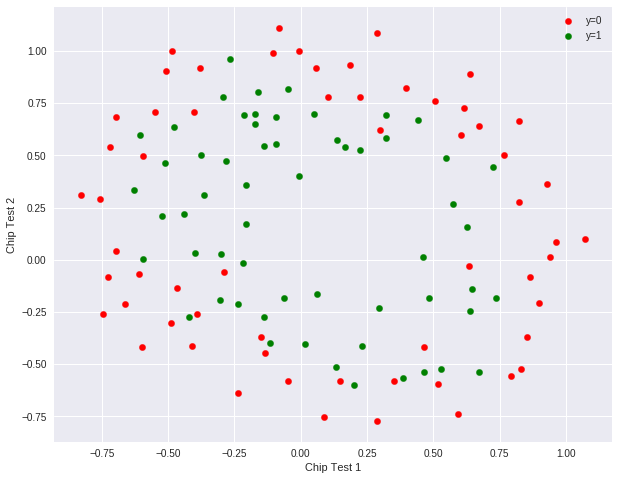

In [10]:
data = pd.read_csv('MLBootCamp/ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

print 'Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...'
plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

### Expanding basis functions and regularizing logistic regression

Theta found by sklearn with L2 reg:  [ 0.62536719  1.18095854 -2.01961804 -0.91752388 -1.43170395  0.12391867
 -0.36536954 -0.35715555 -0.17501434 -1.45827831 -0.05112356 -0.61575808
 -0.27472128 -1.19276292 -0.24241519 -0.20587922 -0.0448395  -0.27780311
 -0.29535733 -0.45625452 -1.04347339  0.02770608 -0.29252353  0.01550105
 -0.32746466 -0.1439423  -0.92460358] [1.27271075]
Accuracy on training set for sklearn theta =  0.8305084745762712


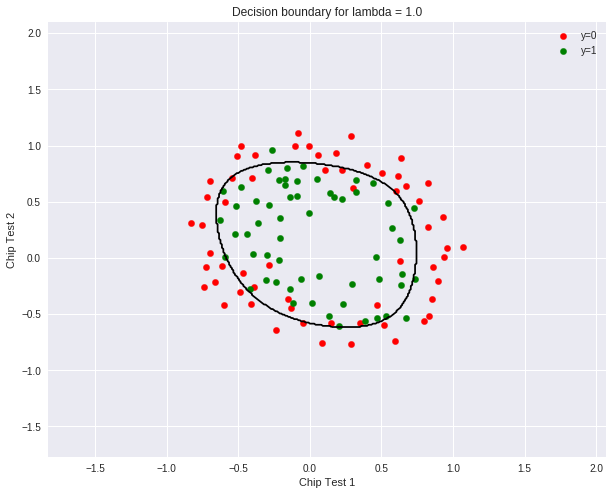

In [13]:
# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

reg = 1.0

sk_logreg = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=True)
sk_logreg.fit(X_poly,y)
print "Theta found by sklearn with L2 reg: ", sk_logreg.coef_[0], sk_logreg.intercept_

# accuracy on training set with sklearn's theta

predy = sk_logreg.predict(X_poly)
print "Accuracy on training set for sklearn theta = ", np.mean(predy==y)

def plot_decision_boundary_sklearn_poly(X,y,sk_logreg,reg,p,  xlabel, ylabel, legend):
    plot_twoclass_data(X,y,xlabel,ylabel,legend)
    
    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    # make predictions on this mesh
    poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
    X_poly = poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()])
       
    
    Z = np.array(sk_logreg.predict(X_poly))

    # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])
    plt.title("Decision boundary for lambda = " + str(reg))

plot_decision_boundary_sklearn_poly(X,y,sk_logreg,reg,p,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

## TODO
Experiment with various values of lambda (reg) in the cell above and comment on accuracies as well 
 as decision boundary shape.


### Regularizing logistic regression with L1 norm

Theta found by sklearn with L1 reg:  [ 0.68648217  1.28027212 -4.86220169 -1.62155172 -2.34059354  0.
  0.          0.          0.          0.          0.          0.
  0.         -2.36894492  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
Accuracy on training set for sklearn theta =  0.7966101694915254


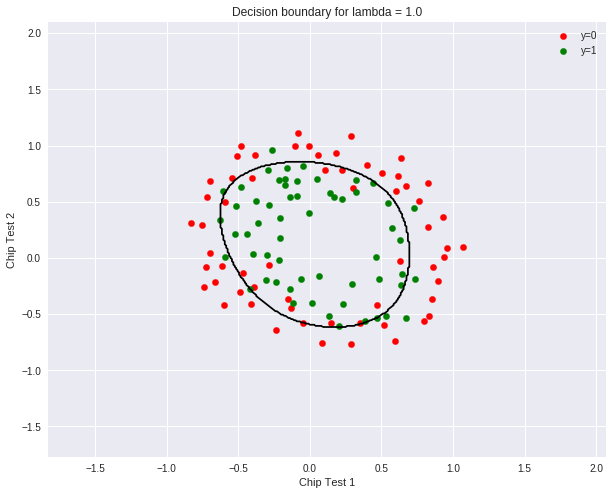

In [15]:
# impose L1 penalty rather than L2; need to use liblinear solver
reg = 1.0
sk_logreg = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=True,penalty='l1')
sk_logreg.fit(X_poly,y)
print "Theta found by sklearn with L1 reg: ", sk_logreg.coef_[0]
predy = sk_logreg.predict(X_poly)
print "Accuracy on training set for sklearn theta = ", np.mean(predy==y)
plot_decision_boundary_sklearn_poly(X,y,sk_logreg,reg,p,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

### Plotting regularization path

Computing regularization path ...


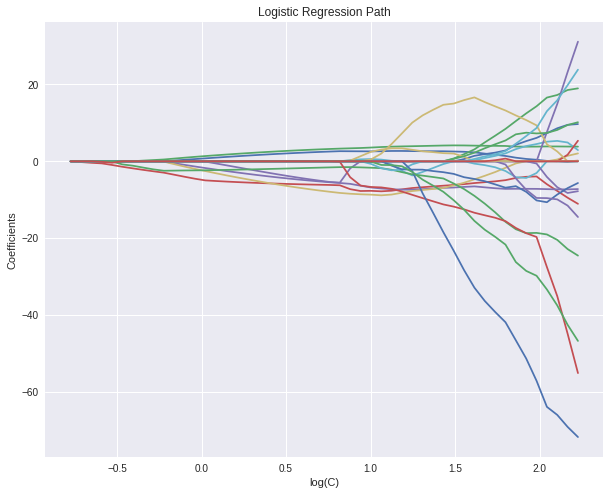

In [17]:
# From
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html#example-linear-model-plot-logistic-path-py

def plot_regularization_path(X,y):
    plt.figure()
    cs = sklearn.svm.l1_min_c(X, y, loss='log') * np.logspace(0, 3)
    print("Computing regularization path ...")
    clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
    coefs_ = []
    for c in cs:
        clf.set_params(C=c)
        clf.fit(X, y)
        coefs_.append(clf.coef_.ravel().copy())

    coefs_ = np.array(coefs_)
    plt.plot(np.log10(cs), coefs_)
    ymin, ymax = plt.ylim()
    plt.xlabel('log(C)')
    plt.ylabel('Coefficients')
    plt.title('Logistic Regression Path')

plot_regularization_path(X_poly,y)